## Visualising representation of genders in tech from Block's public data

See: https://squareup.com/us/en/about/diversity/archive

Datasource: Data was crafted by hand by scraping the following URLs
- https://squareup.com/us/en/about/diversity/workforce-data-2021
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2020
- 2018 is missing
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2019
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2017



In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [16]:
df_tech = pd.DataFrame({
    "report_year": ["2017", "2018", "2019", "2020", "2021"],
    "non_binary" : [np.nan, np.nan, np.nan, 0.002, 0.003],
    "women": [0.188, np.nan, 0.229, 0.232, 0.258],
    "men": [0.812, np.nan, 0.771, 0.765, 0.739]
})
df_tech

,report_year,non_binary,women,men
0,2017,NaN,0.188,0.812
1,2018,NaN,NaN,NaN
2,2019,NaN,0.229,0.771
3,2020,0.002,0.232,0.765
4,2021,0.003,0.258,0.739


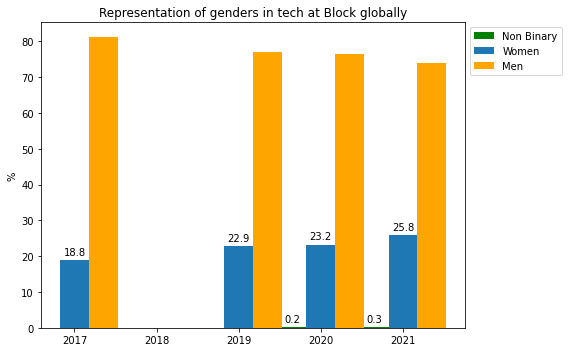

In [25]:
labels = list(df_tech['report_year'])
labels = list(map(str, labels))

women_percentages = df_tech["women"].values * 100
non_binary_percentages = df_tech["non_binary"].values * 100
men_percentages = df_tech["men"].values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[8, 5])
rects1 = ax.bar(x - width, non_binary_percentages, width=width, label='Non Binary', color='green')
rects2 = ax.bar(x, women_percentages, width=width, label='Women', color='tab:blue')
rects3 = ax.bar(x + width, men_percentages, width=width, label='Men', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Representation of genders in tech at Block globally')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1))


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()